In [2]:
!pip install numpy
!pip install sympy
!pip install scipy
!pip install matplotlib
!pip install pandas
!pip install openpyxl

T (eV): 0.50, Rate Constant: 3.1287e-16 m³/s
T (eV): 1.00, Rate Constant: 8.6108e-16 m³/s
T (eV): 1.50, Rate Constant: 1.2336e-15 m³/s
T (eV): 2.00, Rate Constant: 1.5073e-15 m³/s
T (eV): 2.50, Rate Constant: 1.7239e-15 m³/s
T (eV): 3.00, Rate Constant: 1.9070e-15 m³/s
T (eV): 3.50, Rate Constant: 2.0662e-15 m³/s
T (eV): 4.00, Rate Constant: 2.2070e-15 m³/s
T (eV): 4.50, Rate Constant: 2.3352e-15 m³/s
T (eV): 5.00, Rate Constant: 2.4539e-15 m³/s
T (eV): 5.50, Rate Constant: 2.5642e-15 m³/s
T (eV): 6.00, Rate Constant: 2.6675e-15 m³/s
T (eV): 6.50, Rate Constant: 2.7651e-15 m³/s
T (eV): 7.00, Rate Constant: 2.8576e-15 m³/s
T (eV): 7.50, Rate Constant: 2.9456e-15 m³/s
T (eV): 8.00, Rate Constant: 3.0296e-15 m³/s
T (eV): 8.50, Rate Constant: 3.1103e-15 m³/s
T (eV): 9.00, Rate Constant: 3.1879e-15 m³/s
T (eV): 9.50, Rate Constant: 3.2629e-15 m³/s
T (eV): 10.00, Rate Constant: 3.3354e-15 m³/s


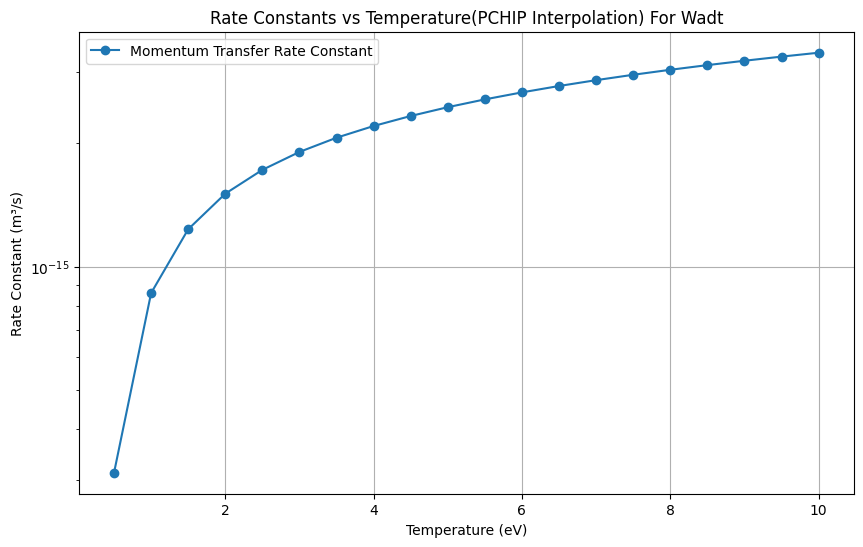

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import PchipInterpolator

# Load data
df = pd.read_excel('charge_transfer_cross_section.xlsx', sheet_name='Wadt')

# Extract columns for Wadt and Total Excitation
x1 = df['Wadt Speed'].dropna().values  # Speeds (v) in m/s
y1 = df['Wadt CS'].dropna().values        # Cross-section σ(v) in m²

# Constants
m_e = 2.1807767e-25  # Xe+ Mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]
# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = (-m_e * x1_sorted**2) / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a PCHIP interpolation of the integrand
    integrand_pchip = PchipInterpolator(x1_sorted, integrand_values, extrapolate=False)
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_pchip(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Momentum Transfer Rate Constant')
plt.title('Rate Constants vs Temperature(PCHIP Interpolation) For Wadt')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
#plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()

/opt/conda/lib/python3.11/site-packages/scipy/interpolate/_cubic.py:302: RuntimeWarning: overflow encountered in divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


T (eV): 0.50, Rate Constant: 4.8050e-16 m³/s
T (eV): 1.00, Rate Constant: 1.0556e-15 m³/s
T (eV): 1.50, Rate Constant: 1.4103e-15 m³/s
T (eV): 2.00, Rate Constant: 1.6634e-15 m³/s
T (eV): 2.50, Rate Constant: 1.8615e-15 m³/s
T (eV): 3.00, Rate Constant: 2.0287e-15 m³/s
T (eV): 3.50, Rate Constant: 2.1727e-15 m³/s
T (eV): 4.00, Rate Constant: 2.3008e-15 m³/s
T (eV): 4.50, Rate Constant: 2.4168e-15 m³/s
T (eV): 5.00, Rate Constant: 2.5233e-15 m³/s
T (eV): 5.50, Rate Constant: 2.6221e-15 m³/s
T (eV): 6.00, Rate Constant: 2.7144e-15 m³/s
T (eV): 6.50, Rate Constant: 2.8013e-15 m³/s
T (eV): 7.00, Rate Constant: 2.8835e-15 m³/s
T (eV): 7.50, Rate Constant: 2.9617e-15 m³/s
T (eV): 8.00, Rate Constant: 3.0363e-15 m³/s
T (eV): 8.50, Rate Constant: 3.1078e-15 m³/s
T (eV): 9.00, Rate Constant: 3.1764e-15 m³/s
T (eV): 9.50, Rate Constant: 3.2425e-15 m³/s
T (eV): 10.00, Rate Constant: 3.3063e-15 m³/s


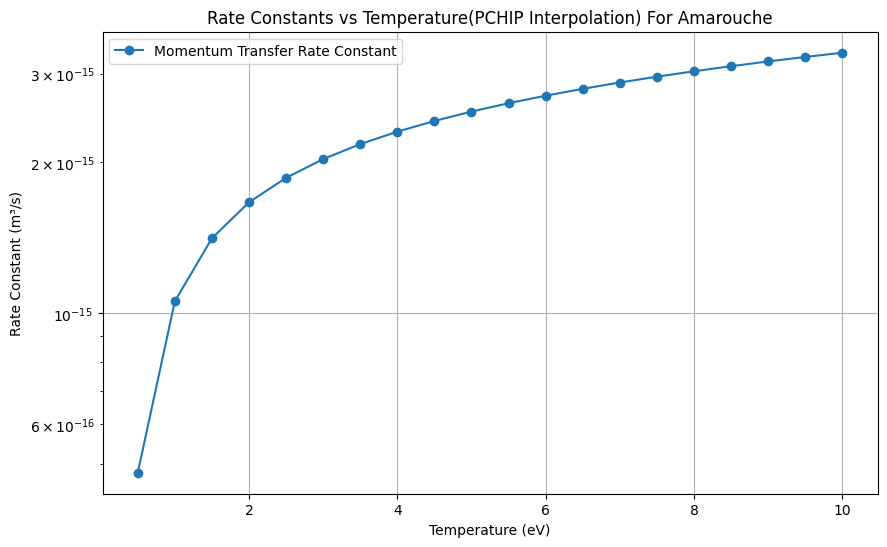

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import PchipInterpolator

# Load data
df = pd.read_excel('charge_transfer_cross_section.xlsx', sheet_name='Wadt')

# Extract columns for Amarouche
x1 = df['Amarouche Speed'].dropna().values  # Speeds (v) in m/s
y1 = df['Amarouche CS'].dropna().values        # Cross-section σ(v) in m²

# Constants
m_e = 2.1807767e-25  # Xe+ Mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]
# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = (-m_e * x1_sorted**2) / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a PCHIP interpolation of the integrand
    integrand_pchip = PchipInterpolator(x1_sorted, integrand_values, extrapolate=False)
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_pchip(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Momentum Transfer Rate Constant')
plt.title('Rate Constants vs Temperature(PCHIP Interpolation) For Amarouche')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
#plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()

/opt/conda/lib/python3.11/site-packages/scipy/interpolate/_cubic.py:302: RuntimeWarning: overflow encountered in divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)


T (eV): 0.50, Rate Constant: 3.6030e-16 m³/s
T (eV): 1.00, Rate Constant: 9.5973e-16 m³/s
T (eV): 1.50, Rate Constant: 1.3624e-15 m³/s
T (eV): 2.00, Rate Constant: 1.6560e-15 m³/s
T (eV): 2.50, Rate Constant: 1.8883e-15 m³/s
T (eV): 3.00, Rate Constant: 2.0840e-15 m³/s
T (eV): 3.50, Rate Constant: 2.2547e-15 m³/s
T (eV): 4.00, Rate Constant: 2.4070e-15 m³/s
T (eV): 4.50, Rate Constant: 2.5453e-15 m³/s
T (eV): 5.00, Rate Constant: 2.6729e-15 m³/s
T (eV): 5.50, Rate Constant: 2.7921e-15 m³/s
T (eV): 6.00, Rate Constant: 2.9040e-15 m³/s
T (eV): 6.50, Rate Constant: 3.0089e-15 m³/s
T (eV): 7.00, Rate Constant: 3.1085e-15 m³/s
T (eV): 7.50, Rate Constant: 3.2044e-15 m³/s
T (eV): 8.00, Rate Constant: 3.2947e-15 m³/s
T (eV): 8.50, Rate Constant: 3.3821e-15 m³/s
T (eV): 9.00, Rate Constant: 3.4662e-15 m³/s
T (eV): 9.50, Rate Constant: 3.5473e-15 m³/s
T (eV): 10.00, Rate Constant: 3.6258e-15 m³/s


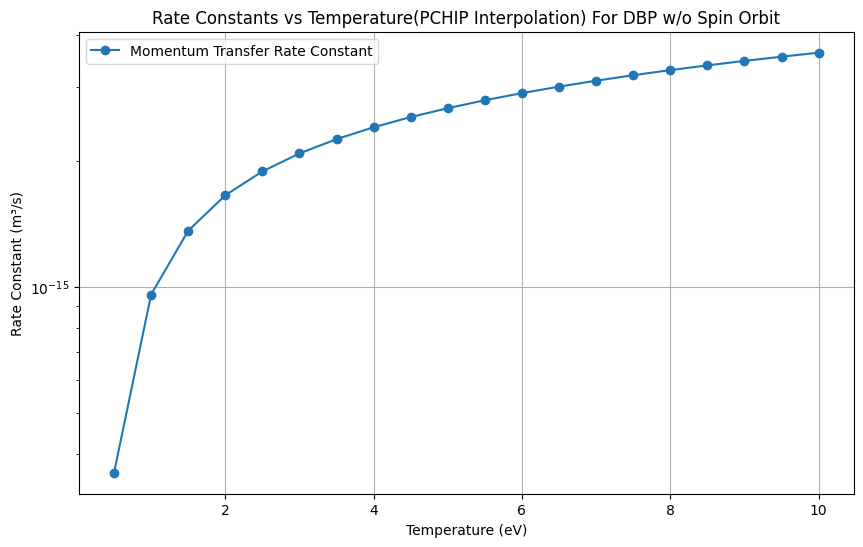

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import PchipInterpolator

# Load data
df = pd.read_excel('charge_transfer_cross_section.xlsx', sheet_name='Wadt')

# Extract columns for Amarouche
x1 = df['DBP w/o Spin Orbit Speed'].dropna().values  # Speeds (v) in m/s
y1 = df['DBP w/o Spin Orbit CS'].dropna().values        # Cross-section σ(v) in m²

# Constants
m_e = 2.1807767e-25  # Xe+ Mass in kg
e = 1.602176634e-19   # Elementary charge in C (also J/eV)

# Temperature array in eV
T_values_eV = np.linspace(0.5, 10, 20)  # From 0.5 eV to 10 eV
K = np.zeros_like(T_values_eV)          # Array to store rate constants

# Speeds (v) range
v_min = x1.min()
v_max = x1.max()

# Ensure the speeds are sorted in ascending order
sort_indices = np.argsort(x1)
x1_sorted = x1[sort_indices]
y1_sorted = y1[sort_indices]
# For each temperature T
for idx, T_eV in enumerate(T_values_eV):
    # Compute the integrand values at each v
    exponent = (-m_e * x1_sorted**2) / (2 * e * T_eV)
    integrand_values = y1_sorted * x1_sorted**3 * np.exp(exponent)
    
    # Create a PCHIP interpolation of the integrand
    integrand_pchip = PchipInterpolator(x1_sorted, integrand_values, extrapolate=False)
    
    # Define the integrand function for integration
    def integrand_func(v):
        return integrand_pchip(v)
    
    # Integrate the interpolated integrand over v
    try:
        integral_result, _ = quad(integrand_func, v_min, v_max, limit=1000)
    except Exception as e:
        print(f"Integration failed at T = {T_eV} eV: {e}")
        integral_result = np.nan  # Assign NaN if integration fails
    
    # Compute the prefactor
    prefactor = 4 * np.pi * (m_e / (2 * np.pi * e * T_eV))**1.5
    
    # Compute the rate constant K[T]
    K[idx] = prefactor * integral_result
    
    print(f"T (eV): {T_eV:.2f}, Rate Constant: {K[idx]:.4e} m³/s")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values_eV, K, marker='o', label='Momentum Transfer Rate Constant')
plt.title('Rate Constants vs Temperature(PCHIP Interpolation) For DBP w/o Spin Orbit')
plt.xlabel('Temperature (eV)')
plt.ylabel('Rate Constant (m³/s)')
plt.yscale('log')
#plt.ylim(10**(-18), 10**(-13))
plt.legend()
plt.grid(True)
plt.show()